In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical

X = np.load("/content/drive/MyDrive/Classroom/ASL_Gestures_36_Classes/x_landmarks.npy")
y = np.load("/content/drive/MyDrive/Classroom/ASL_Gestures_36_Classes/y_labels.npy")


y = to_categorical(y, num_classes=36)



In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

model = Sequential([

    Dense(512, input_shape=(42,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(256, input_shape=(63,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(128, input_shape=(63,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),


    Dense(36, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,676 (783.89 KB)

 Trainable params: 198,756 (776.39 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

In [10]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

model.save("/content/drive/MyDrive/Classroom/ASL_Gestures_36_Classes/landmark_model.h5")

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - accuracy: 0.0531 - loss: 3.6759 - val_accuracy: 0.0808 - val_loss: 3.5087 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2805 - loss: 2.6906 - val_accuracy: 0.2308 - val_loss: 3.4116 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4677 - loss: 2.1929 - val_accuracy: 0.1808 - val_loss: 3.2924 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5292 - loss: 1.8752 - val_accuracy: 0.1923 - val_loss: 3.1647 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6111 - loss: 1.5728 - val_accuracy: 0.1385 - val_loss: 3.0997 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6384 - loss: 1.4059 - val_accuracy: 0.1308 - val_loss: 3.0338 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6807 - loss: 1.2103 - val_

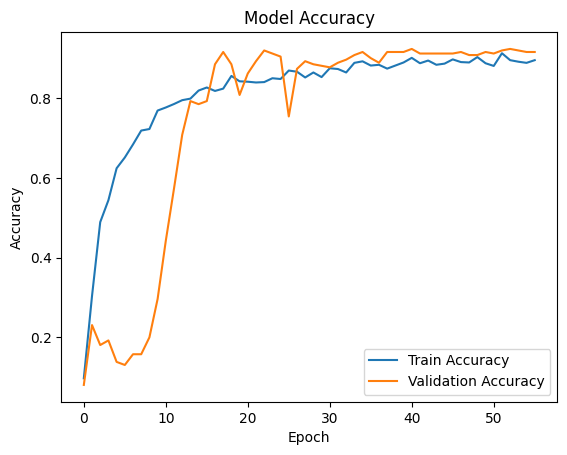

In [11]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
#Evaluate
import numpy as np
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical

X = np.load("/content/drive/MyDrive/Classroom/ASL_Gestures_36_Classes/test_landmarks.npy")
y = np.load("/content/drive/MyDrive/Classroom/ASL_Gestures_36_Classes/test_labels.npy")


y = to_categorical(y, num_classes=36)


In [13]:
loss, accuracy = model.evaluate(X,y, batch_size=64)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9604 - loss: 0.1692  
Test Loss: 0.18066288530826569
Test Accuracy: 0.9444444179534912
